# 第一题 （30分）

记一个大小为$M$行$N$列的矩阵为$A$，并记其中第$i$行第$j$列的元素为$A_{i,j}$，行数和列数均从$1$开始。

考虑如下定义的矩阵：$A_{i,j}=i \times j$，即$A$为一个$M \times N$的乘法表矩阵。下面的示例给出了$3 \times 3$的乘法表矩阵。

\begin{array}{|c|c|c|}
    \hline
    1&2&3\\
    \hline
    2&4&6\\
    \hline
    3&6&9\\
    \hline
\end{array}

对于更一般的乘法表矩阵，考虑如下问题：给定三个整数$M$、$N$和$K$，请在大小为 $M\times N$的乘法表中，找出并返回前$K$个最小数字的和。

比如，对于示例中的$3 \times 3$的乘法表矩阵，将矩阵元素从小到大排列成一行后，得到的列表如下。第一行为矩阵元素，第二行为第几小的编号。
\begin{array}{|c|c|c|c|c|c|c|c|c|}
    \hline
    1&2&2&3&3&4&6&6&9\\
    \hline
    1&2&3&4&5&6&7&8&9\\
    \hline
\end{array}

当$K=3$时，前3个最小的数为$[1,2,2]$，因此应返回$5$。
注：当$K \le 0$时，应返回$0$。

请完成下方函数`find_smallest_sum(M, N, K, verbose=False)`的定义，其返回值即前$K$个最小数字的和。

其中，当`verbose=True`时，函数需在执行过程中，额外打印出两部分内容，即原始的乘法表矩阵，以及从小到大排列成一行后的矩阵元素列表。输出的正确性占5分，美观度占5分。具体格式可参考下面给出的示例。

请使用你定义的函数跑通这一题的后续代码，并展示输出。

参考：https://leetcode.cn/problems/kth-smallest-number-in-multiplication-table/

In [1]:
from itertools import product


def find_smallest_sum(M, N, K, verbose=False) -> int:
    fmat = [i * j for i, j in product(range(1, M + 1), range(1, N + 1))]
    if verbose:
        line_len = 100
        print("=" * line_len)

        print("Multiplication Matrix:")
        max_len = len(str(M * N))
        for line in (fmat[i : i + N] for i in range(0, M * N, N)):
            print(" ".join(f"{x:>{max_len}}" for x in line))

        print("-" * line_len)

        print("Flattened Matrix:")
        lim = (line_len - 6) // (
            max_len + 2
        )  # line_len = 7 + max_len * lim + 2 * (lim - 1) + 1
        idx_fmat = list(zip(range(1, M * N + 1), sorted(fmat)))
        lines = [idx_fmat[i : i + lim] for i in range(0, M * N, lim)]

        for lidx, line in enumerate(lines):
            if lidx == len(lines) - 1:
                print("Index: " + ", ".join([f"{idx:>{max_len}}" for idx, _ in line]))
                print("Value: " + ", ".join([f"{val:>{max_len}}" for _, val in line]))
                continue
            print("Index: " + ", ".join([f"{idx:>{max_len}}" for idx, _ in line]) + ",")
            print("Value: " + ", ".join([f"{val:>{max_len}}" for _, val in line]) + ",")
            print()

        print("-" * line_len)

        print(f"The sum of the smallest {K} values: {sum(sorted(fmat)[:K])}")

        print("=" * line_len)
    return sum(sorted(fmat)[:K])


In [2]:
find_smallest_sum(5, 5, 20)


129

上面的函数调用期待的输出应为
```
129
```

In [3]:
find_smallest_sum(5, 5, 4, verbose=True)


Multiplication Matrix:
 1  2  3  4  5
 2  4  6  8 10
 3  6  9 12 15
 4  8 12 16 20
 5 10 15 20 25
----------------------------------------------------------------------------------------------------
Flattened Matrix:
Index:  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
Value:  1,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  8,  8,  9, 10, 10, 12, 12, 15, 15, 16, 20,

Index: 24, 25
Value: 20, 25
----------------------------------------------------------------------------------------------------
The sum of the smallest 4 values: 8


8

上面的函数调用期待的输出应为

```
--------------
乘法表矩阵：
 1  2  3  4  5
 2  4  6  8 10
 3  6  9 12 15
 4  8 12 16 20
 5 10 15 20 25
--------------
排好序的矩阵元素列表：
[1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 8, 8, 9, 10, 10, 12, 12, 15, 15, 16, 20, 20, 25]
--------------
8
```

In [4]:
find_smallest_sum(7, 7, 5, verbose=True)


Multiplication Matrix:
 1  2  3  4  5  6  7
 2  4  6  8 10 12 14
 3  6  9 12 15 18 21
 4  8 12 16 20 24 28
 5 10 15 20 25 30 35
 6 12 18 24 30 36 42
 7 14 21 28 35 42 49
----------------------------------------------------------------------------------------------------
Flattened Matrix:
Index:  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
Value:  1,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  6,  6,  7,  7,  8,  8,  9, 10, 10, 12, 12,

Index: 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
Value: 12, 12, 14, 14, 15, 15, 16, 18, 18, 20, 20, 21, 21, 24, 24, 25, 28, 28, 30, 30, 35, 35, 36,

Index: 47, 48, 49
Value: 42, 42, 49
----------------------------------------------------------------------------------------------------
The sum of the smallest 5 values: 11


11

上面的函数调用期待的输出应为

```
--------------------
乘法表矩阵：
 1  2  3  4  5  6  7
 2  4  6  8 10 12 14
 3  6  9 12 15 18 21
 4  8 12 16 20 24 28
 5 10 15 20 25 30 35
 6 12 18 24 30 36 42
 7 14 21 28 35 42 49
--------------------
排好序的矩阵元素列表：
[1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 9, 10, 10, 12, 12, 12, 12, 14, 14, 15, 15, 16, 18, 18, 20, 20, 21, 21, 24, 24, 25, 28, 28, 30, 30, 35, 35, 36, 42, 42, 49]
--------------------
11
```

# 第二题 （30分）

在这一题中，你将根据一个[Polybius加密算法](https://ctf-wiki.org/crypto/classical/polyalphabetic/)，实现对一段文本的加密和解密。约定文本仅由大写字母书写而成。

Polybius密码又称为棋盘密码，加密过程是将给定的明文根据密码表加密为两两组合的数字，密码表由一个$5 \times 5$的矩阵表示。下面给出了一个常用密码表。

```
|   	| 1 	| 2 	| 3 	| 4   	| 5 	|
|---	|---	|---	|---	|-----	|---	|
| 1 	| A 	| B 	| C 	| D   	| E 	|
| 2 	| F 	| G 	| H 	| I/J 	| K 	|
| 3 	| L 	| M 	| N 	| O   	| P 	|
| 4 	| Q 	| R 	| S 	| T   	| U 	|
| 5 	| V 	| W 	| X 	| Y   	| Z 	|
```

记密码表矩阵为$A$，其第$i$行第$j$列（从1开始计数）的元素记为$A_{ij}$。该密码表的含义为，将文本中所有出现的$A_{ij}$字母，替换为数字$ij$。

比如，将文本中所有出现的'L'字母，替换为数字$31$。由于英文字母有26个，比矩阵的元素个数多出一个，因此约定将I、J两个字母均视为字母I。

如果待加密文本为`HELLO`，那么根据上述密码表进行加密后，结果应为`2315313134`。如果再对这个结果进行解密，应该得到`HELLO`。

请在下方完成下面两个函数的定义。

+ `encrypt(text, codebook)`：其中，text为待加密文本（一个字符串），codebook为密码表（一个列表），函数需返回加密后的文本（一个字符串）。
+ `decrypt(text, codebook)`：其中，text为待解密文本（一个字符串），codebook为密码表（一个列表），函数需返回解密后的文本（一个字符串）。

密码表`codebook`是一个嵌套列表。其第$i$个元素（$i$从0计数），`codebook[i]`，是一个列表，对应$A$矩阵的第$i+1$行的所有元素。该列表中的第$j$个元素（$j$从0计数），`codebook[i][j]`，对应矩阵元素$A_{(i+1)(j+1)}$。`codebook[i][j]`本身是一个字符，表示一个英文大写字母。比如，示例中的密码表对应的`codebook`如下。
```
[['A', 'B', 'C', 'D', 'E'],
 ['F', 'G', 'H', 'I', 'K'],
 ['L', 'M', 'N', 'O', 'P'],
 ['Q', 'R', 'S', 'T', 'U'],
 ['V', 'W', 'X', 'Y', 'Z']]
```
注意到`codebook`中不包含字母`J`，因为根据约定，文本中所有出现的`J`都会被视为`I`。

加密函数解密函数各占一半分数。


请使用你定义的函数跑通这一题的后续代码，并展示输出。

In [5]:
def encrypt(text: str, codebook: list[list[str]]) -> str:
    text = text.replace("J", "I")
    codebook = "".join(["".join(line) for line in codebook])

    def c(ch: str) -> str:
        p = codebook.find(ch)
        a, b = divmod(p, 5)
        return f"{a + 1}{b + 1}"

    return "".join([c(ch) for ch in text if ch.isalpha()])


def decrypt(text, codebook):
    pos = [
        (int(text[i]) - 1, int(text[i + 1]) - 1) for i in range(0, len(text), 2)
    ]
    return "".join([codebook[x][y] for x, y in pos])


In [6]:
codebook = [
    ["A", "B", "C", "D", "E"],
    ["F", "G", "H", "I", "K"],
    ["L", "M", "N", "O", "P"],
    ["Q", "R", "S", "T", "U"],
    ["V", "W", "X", "Y", "Z"],
]


In [7]:
text = "HELLO"
encrypt(text, codebook)


'2315313134'

In [8]:
decrypt(encrypt(text, codebook), codebook)


'HELLO'

In [9]:
text = "INJECT"
encrypt(text, codebook)


'243324151344'

In [10]:
decrypt(encrypt(text, codebook), codebook)


'INIECT'

注意到`codebook`中的字母顺序即便随意打乱，编解码过程应该也能跑的通。打乱字母顺序相当于更换用来加密和解密的密码本。请试试利用下面的新密码本，解码给定的密文。

In [11]:
# 请不要改动这里的代码
import random
from string import ascii_uppercase

random.seed(101)

letters = list(ascii_uppercase.replace("J", ""))
random.shuffle(letters)
letters = "".join(letters)

codebook = []
for i in range(5):
    row = []
    for j in range(5):
        idx = i * 5 + j
        row.append(letters[idx])
    codebook.append(row)


text = "1222312322534214445522245323514355421433"


In [12]:
decrypt(text, codebook)


'LIFEISHORTIUSEPYTHON'

# 第三题 （30分）

这道题一共4问。后3问兼具趣味性与挑战性，但是考虑到完成难度较高，分配的分值并不高。学有余力的同学可多花点时间尝试完成这3问。

## 第一问（25分）

请阅读指定材料，然后补全下面给出的三个函数，来实现n阶幻方的生成、检查、以及展示。其中，n一定为大于等于3的奇数。

+ 什么是幻方以及最简单的构造方案：https://baike.baidu.com/item/%E5%B9%BB%E6%96%B9/169544

    下面的幻方生成算法摘自这篇文章，并针对本题要求做出了适当改动。可以结合第二问的演示动画来理解。

    ```
    考虑一个n行n列的矩阵，从上往下依次为第1行、第2行、以此类推，从左往右依次为第1列、第2列、以此类推。
    (1) 将1放在第一行中间一列；
    (2) 从2开始直到n*n为止，各数依次按下列规则存放：
        (a) 按45°方向向右上方行走，每一个数存放的行比前一个数的行数减1，列数加1；
        (b) 如果行列范围超出矩阵范围，则回绕。例如1在第1行，则2应放在最底下一行，列数同样加1；
        (c) 如果按上面规则确定的位置上已有数，则把下一个数放在上一个数的下面。
    ```
    该算法被称为[Siamese method](https://en.wikipedia.org/wiki/Siamese_method#The_method)，有关其证明可参考论文[A Proof of the "Magicness" of the Siam Construction of a Magic Square](https://scholar.rose-hulman.edu/rhumj/vol19/iss1/3)。（校园网可能无法访问）
+ 如何格式化可变长度的字符串？ https://stackoverflow.com/questions/36962995/format-in-python-by-variable-length

In [13]:
def generate_magic_square(n: int) -> list[list[int]]:
    """
    假设n为大于等于3的奇数，该函数将数字[1,2,...,n*n]排列为一个n*n的幻方。
    排列的结果需要存储在一个嵌套列表`matrix`中，`matrix[i][j]`对应幻方的第i行第j列。
    比如，当n=3时，`matrix`的值为
        [[8, 1, 6], [3, 5, 7], [4, 9, 2]]
    该函数返回`matrix`。
    """
    assert n >= 3 and n % 2 == 1, (
        "n must be an odd number greater than or equal to 3"
    )
    matrix = [[0 for j in range(n)] for i in range(n)]
    x, y = 0, n // 2
    for i in range(1, n**2 + 1):
        if matrix[x][y] != 0:
            x, y = (x + 2) % n, (y + n - 1) % n
        matrix[x][y] = i
        x, y = (x + n - 1) % n, (y + 1) % n
    return matrix


def is_magic_square(matrix: list[list[int]]) -> bool:
    """
    该函数以函数`generate_magic_square`的返回值作为输入，并检查`matrix`对应的方阵，
    每行和、每列和以及正反对角线元素的和，是否都相等。
    如果传入的`matrix`参数构成一个幻方，则返回True，否则返回False。
    """
    n = len(matrix)
    s = (1 + n**2) * n // 2
    line_sum = [sum(line) for line in matrix]
    row_sum = [sum(line[i] for line in matrix) for i in range(n)]
    diag_sum = [
        sum(matrix[i][i] for i in range(n)),
        sum(matrix[i][n - 1 - i] for i in range(n)),
    ]
    return all(x == s for x in line_sum + row_sum + diag_sum)


def render_square(matrix: list[list[int]], max_n_digit: int) -> None:
    """
    该函数以任意n*n的以双层列表形式存储的矩阵`matrix`作为输入，并将矩阵用`print`函数打印出来。
    比如，对于函数`generate_magic_square`返回的5*5的幻方，当`max_n_digit=2`时，打印效果如下：

    17 24  1  8 15
    23  5  7 14 16
     4  6 13 20 22
    10 12 19 21  3
    11 18 25  2  9

    （请忽略掉空行）
    注意，矩阵的每个格子需要等宽，且格子中的数字需要右对齐。
    格子的宽度通过传入的参数`max_n_digit`确定。比如，`max_n_digit=3`意味着每个格子占3个字符。
    每行相邻的两个格子，间隔一个空格字符。
    """
    print(
        "\n".join(
            " ".join(f"{x:>{max_n_digit}}" for x in line) for line in matrix
        )
    )


请使用下面的代码测试你实现的函数。注意尝试不同的`n`的取值。

In [14]:
n = 5
matrix = generate_magic_square(n)
if is_magic_square(matrix):
    max_n_digit = len(str(n * n))
    n_dash = (max_n_digit + 1) * n - 1
    print("-" * n_dash)
    render_square(matrix, max_n_digit)


--------------
17 24  1  8 15
23  5  7 14 16
 4  6 13 20 22
10 12 19 21  3
11 18 25  2  9


## 第二问（3分）

请基于第一次作业最后一题的动画绘制代码，以及本题你的答案，编写程序可视化n阶幻方的生成过程（n为奇数）。下面展示了`n=5`时，程序需要输出的动画，以每秒一帧的方式生成。

+ 类似于第一问的设定，每个格子的宽度由变量`max_n_digit`定义。
+ 注意展示画布的初始状态，即在填数字之前，每个格子的数字位置由字符`.`填充。
+ 请将每秒帧数定义为变量`frame_per_second`，并根据该变量的取值设定动画的播放速度。

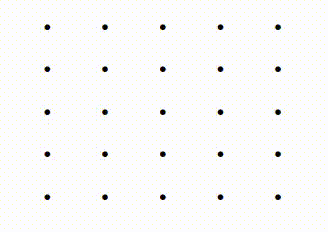

In [15]:
from time import sleep

from IPython.display import clear_output

n = 5
frame_per_second = 1

max_n_digit = len(str(n * n))


def render_matrix(matrix: list[list[int]], none: str = ".") -> None:
    lines = []
    for line in matrix:
        lines.append(
            " ".join(f"{(x if x else none):>{max_n_digit}}" for x in line)
        )
    print("\n".join(lines))


def generate_magic_square_by_step(n: int) -> list[list[int]]:
    assert n >= 3 and n % 2 == 1, (
        "n must be an odd number greater than or equal to 3"
    )
    matrix = [[0 for j in range(n)] for i in range(n)]
    x, y = 0, n // 2
    for i in range(1, n**2 + 1):
        if matrix[x][y] != 0:
            x, y = (x + 2) % n, (y + n - 1) % n
        matrix[x][y] = i
        x, y = (x + n - 1) % n, (y + 1) % n
        yield matrix


for matrix in generate_magic_square_by_step(n):
    clear_output(wait=True)
    render_matrix(matrix)
    sleep(1 / frame_per_second)


17 24  1  8 15
23  5  7 14 16
 4  6 13 20 22
10 12 19 21  3
11 18 25  2  9


## 第三问（1分）

将1到9这9这个数字填入3\*3的矩阵中，一共有9!（阶乘符号）种不同的填法。请通过暴力穷举法，结合第一问中定义的`is_magic_square`函数，找出这些填法中的所有3阶幻方，并将这些幻方存入列表`magic_square_l`中。请展示你找到的3阶幻方的总个数。

In [16]:
# 请不要改动下面的代码
n = 3
m = n * n
# total number of ways of creating a n*n matrix with numbers from 1 to 9 filled in
total_n_perm = 1
for i in range(m):
    total_n_perm *= i + 1
print(total_n_perm)


362880


In [17]:
from itertools import permutations  # 有点偷懒了，但是这样确实会快


def permutations_(arr):
    if not isinstance(arr, list):
        arr = [item for item in arr]
    if len(arr) == 0:
        yield []
        return
    for i in range(len(arr)):
        for p in permutations_(arr[:i] + arr[i + 1 :]):
            yield [arr[i]] + p


def generate_magic_square_by_perm(
    n: int, use_builtin_perm: bool = True
) -> list[list[int]]:
    permute = permutations if use_builtin_perm else permutations_
    for perm in permute(range(1, n**2 + 1)):
        matrix = [list(perm[i * n : (i + 1) * n]) for i in range(n)]
        if is_magic_square(matrix):
            yield matrix


magic_square_l = list(generate_magic_square_by_perm(n))


In [18]:
print(len(magic_square_l))


8


## 第四问（1分）

请实现下面预定义的函数`render_square_l`，将前一问中找到的所有3阶幻方以矩阵的排布方式，使用`print`函数打印出来。具体来说，每$M$个幻方为一组，每组幻方并排展示。每排内部的幻方之间以由参数`col_sep`构成的一列做分隔符，排与排之间以由参数`row_sep`构成的一行做分隔符。最后，有关参数`max_n_digit`的含义，请参考第一问中，函数`render_square`给出的说明。

下面的截图展示了函数调用语句
```
    render_square_l(magic_square_l, M=2, col_sep=' | ', row_sep='=')
```
的部分输出结果（**仅最后两排**）。

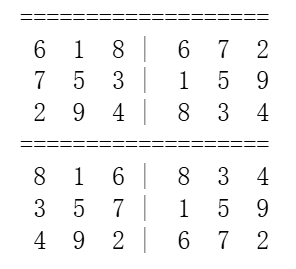

注：Jupyter notebook的输出格子默认启用了自动换行机制，即单行输出的字符长度超过上限时，会换行显示。因此，请确保你看到的换行结果不是由自动换行导致的。一般而言，当`M=3`时，每组幻方应当能实现并排展示，且不触发自动换行。如果你的显示器分辨率不够，可以在较低的`M`取值上测试程序，但需要保证实现的正确性。给该题评分时，我会保证评分用的电脑显示器分辨率足够宽，可以正常显示直到`M=9`的调用结果，因此我也会测试你的程序在`M=9`时的展示效果。

In [19]:
def render_square_l(matrix_l, M, col_sep, row_sep, max_n_digit=1):
    def str_(x):
        return f"{x:>{max_n_digit}}"

    n = len(matrix_l[0])
    line_length = (
        (max_n_digit * n + 1 * (n - 1)) * M + len(col_sep) * (M - 1) + 2
    )

    matrix_l = [matrix_l[i : i + M] for i in range(0, len(matrix_l), M)]

    for row in matrix_l:
        print(row_sep * line_length)
        for i in range(n):
            line = col_sep.join([
                " ".join(map(str_, matrix[i])) for matrix in row
            ])
            print(" " + line + " ")


render_square_l(magic_square_l, M=7, col_sep=" | ", row_sep="=", max_n_digit=1)


 2 7 6 | 2 9 4 | 4 3 8 | 4 9 2 | 6 1 8 | 6 7 2 | 8 1 6 
 9 5 1 | 7 5 3 | 9 5 1 | 3 5 7 | 7 5 3 | 1 5 9 | 3 5 7 
 4 3 8 | 6 1 8 | 2 7 6 | 8 1 6 | 2 9 4 | 8 3 4 | 4 9 2 
 8 3 4 
 1 5 9 
 6 7 2 


## 拓展阅读

+ 方开泰, & 郑妍珣. (2013). 数学与文化交融的奇迹——幻方. 数学文化, 4, 52–56.
  - 提供了有关幻方文化的趣味知识。


+ Arroyo, J. (2018). A Proof of the “Magicness” of the Siam Construction of a Magic Square. Rose-Hulman Undergraduate Mathematics Journal, 19(1). https://scholar.rose-hulman.edu/rhumj/vol19/iss1/3
  - 提供了有关siamese method的简单证明。

+ The math behind the Siamese method of generating magic squares. (n.d.). Retrieved April 5, 2024, from https://thospel.home.xs4all.nl/siamese.html
  - 提供了有关siamese method的更一般的证明，但写的较为晦涩。

+ Peng, C.-C., Tsai, C.-J., Chang, T.-Y., Yeh, J.-Y., & Lee, M.-C. (2020). Novel heterogeneous grouping method based on magic square. Information Sciences, 517, 340–360. https://doi.org/10.1016/j.ins.2019.12.088
  - 利用幻方开发的学生分组算法。是幻方在信息管理领域的一个应用。


# 第四题（10分）

这道题考察大家与大语言模型协作的能力，即是否能识别出大语言模型给出的回复中有误的内容，并引导它给出正确的回答。
请参考下述与大语言模型KimiChat的对话记录，并指出大语言模型回复中存在错误的地方。请直接在下方格子给出你的文字回答。
回答中既需要向大语言模型指出问题，也需要给出引导，尝试让它生成更符合需求的答案。在这个案例里，我们期望得到一个在效率上有所优化的字符串比较函数。

对话记录链接：[https://kimi.moonshot.cn/share/crt3hslskq8lofg6kv9g](https://kimi.moonshot.cn/share/crt3hslskq8lofg6kv9g)。
也可参考canvas第二次作业页面中，提供的聊天记录PDF文件。

## 错误之处

很明显，这个新函数忽略了上文要求的“使用ord函数和基本的条件表达式来比较”。而且，这个函数最好直接返回`True`或者`False`。

同时，也没有采用它自己提出来的优化方法，比如利用内置函数处理特殊情形，也没有缓存。

## 改进提示词

这个优化版本的函数存在一些问题，请你改正。

+ 这个新函数忽略了“使用ord函数和基本的条件表达式来比较”这个条件。
+ 这个新函数采用了-1和1作为返回值，我希望能够采用`True`和`False`（`True`表示小于，`False`表示不小于）。

同时，使用下面的方法进行优化。

+ 优先使用时间复杂度小的方法判断特殊情形，如先判断字符串长短
+ 利用内置函数处理特殊情形
+ 采用记忆化的方法缓存

请给我优化后的函数，它应该长下面这样

```python
def strcmp(s1:str, s2:str) -> bool:
    """Return True if s1 is smaller than s2"""
```

## 结果

好的，我会根据你的要求对函数进行优化。以下是满足条件的优化版本：

```python
def strcmp(s1: str, s2: str) -> bool:
    """Return True if s1 is smaller than s2"""
    # 使用内置的min函数获取较短的字符串长度
    min_len = min(len(s1), len(s2))
    
    # 使用zip和ord函数逐字符比较
    for i in range(min_len):
        if ord(s1[i]) < ord(s2[i]):
            return True
        elif ord(s1[i]) > ord(s2[i]):
            return False
    
    # 如果所有字符都相等，比较字符串长度
    return len(s1) < len(s2)

# 示例
print(strcmp("apple", "banana"))  # True
print(strcmp("banana", "apple"))  # False
print(strcmp("apple", "apple"))   # False
print(strcmp("apple", "app"))     # False
print(strcmp("app", "apple"))     # True
```

### 优化点说明：
1. **优先使用时间复杂度小的方法判断特殊情形**：
   - 在逐字符比较之前，先通过`min(len(s1), len(s2))`获取较短的字符串长度，这样可以减少不必要的循环。
   - 如果所有字符都相等，最后通过比较字符串长度来确定结果，这也是一个时间复杂度为O(1)的操作。

2. **利用内置函数处理特殊情形**：
   - 使用`min`函数来获取较短的字符串长度，避免手动编写比较逻辑。
   - 使用`ord`函数获取字符的Unicode码点值，这是Python内置的高效函数。

3. **采用记忆化的方法缓存**：
   - 如果需要进一步优化，可以使用`functools.lru_cache`来缓存已经比较过的字符串对。但请注意，字符串比较通常是不可变操作，且字符串可能非常多，因此缓存的实用性取决于具体场景。如果字符串重复率很高，缓存可以显著提高性能。

以下是加入缓存的版本：

```python
from functools import lru_cache

@lru_cache(maxsize=None)  # 使用缓存，maxsize=None表示无限制缓存
def strcmp(s1: str, s2: str) -> bool:
    """Return True if s1 is smaller than s2"""
    # 使用内置的min函数获取较短的字符串长度
    min_len = min(len(s1), len(s2))
    
    # 使用zip和ord函数逐字符比较
    for i in range(min_len):
        if ord(s1[i]) < ord(s2[i]):
            return True
        elif ord(s1[i]) > ord(s2[i]):
            return False
    
    # 如果所有字符都相等，比较字符串长度
    return len(s1) < len(s2)

# 示例
print(strcmp("apple", "banana"))  # True
print(strcmp("banana", "apple"))  # False
print(strcmp("apple", "apple"))   # False
print(strcmp("apple", "app"))     # False
print(strcmp("app", "apple"))     # True
```

### 注意：
- 缓存的使用需要根据实际场景决定。如果字符串比较操作非常频繁且字符串重复率高，缓存可以显著提高性能。但如果字符串是动态生成的且不重复，缓存可能会占用过多内存。

## 更多对话细节

点击链接查看和 Kimi 的对话 https://kimi.moonshot.cn/share/d0leh3nahd8djsvc2gag

In [20]:
def strcmp(s1: str, s2: str) -> bool:
    """Return True if s1 is smaller than s2"""
    # 检查输入是否为字符串
    if not isinstance(s1, str) or not isinstance(s2, str):
        raise TypeError("Both inputs must be strings.")
    
    # 先比较长度
    if len(s1) < len(s2):
        return True
    elif len(s1) > len(s2):
        return False
    
    # 如果长度相同，使用zip逐个字符比较
    for char1, char2 in zip(s1, s2):
        if ord(char1) < ord(char2):
            return True
        elif ord(char1) > ord(char2):
            return False
    
    # 所有字符都相等
    return False

# 示例
print(strcmp("apple", "banana"))  # True
print(strcmp("banana", "apple"))  # False
print(strcmp("apple", "apple"))   # False
print(strcmp("apple", "app"))     # False
print(strcmp("app", "apple"))     # True

True
False
False
False
True
